Tarea 2 Julián Proboste

**P4.** Numerically solve the perturbation equations for a matter component with $w = \delta p = \sigma = 0$, where $w$ is the equation of state parameter, $\delta p$ the pressure perturbation and $\sigma$ the anisotropic stress. Assume a $\Lambda CDM$ model with $\Omega_{r,0} = 10^{-4}$ and $\Omega_{m,0} = 0.3$. Plot your results for $10^{-4} \leq a \leq 1$ and four different scales: $k = H_0$, $k = 5H_0$, $k = 20H_0$ and $k = 200H_0$. Consider $H_0 = 67 \, \text{Km}/(\text{sMpc})$.



Las ecuaciones de Einstein para las componentes $00$ y $0i$ son:

$$
k^{2} \phi + 3\mathcal{H}(\dot{\phi} + \mathcal{H} \phi) = -4 \pi G a^{2} \delta \rho
$$

$$
k^{2} (\dot{\phi} + \mathcal{H} \phi) = 4 \pi G a^{2} (1 + \omega) \bar{\rho} \theta
$$

donde los puntos representan derivadas respecto al tiempo conforme $\tau$, el parámetro de Hubble conforme es $\mathcal{H} = \frac{\dot{a}}{a} = a(t) H(t)$, y el parámetro de estado se define como $\omega = \frac{p}{\rho}$. El lado derecho de estas ecuaciones corresponde a las componentes perturbadas del tensor energía-momento, el cual incluye todas las componentes del universo. Definiendo la densidad crítica como $\rho_{\text{cr}} = \frac{3 \mathcal{H}_0^{2}}{8 \pi G a^{2}}$, los parámetros de densidad como $\Omega_{a} = \frac{\bar{\rho}_{a}}{\rho_{\text{cr}}} = \Omega_{a,0} a^{-3(1 + \omega_{a})}$, el contraste de densidad para cada componente como $\delta_{a} = \frac{\delta \rho_{a}}{\bar{\rho}_{a}}$, y la divergencia del campo de velocidad como $v_{a} = (1 + \omega_{a}) \theta_{a}$, las ecuaciones quedan:

$$
k^{2} \phi + 3 \mathcal{H} (\dot{\phi} + \mathcal{H} \phi) = -\frac{3}{2} \mathcal{H}_0^{2} \left( \frac{\Omega_{r,0} \delta_{r}}{a^{4}} + \frac{\Omega_{m,0} \delta_{m}}{a^{3}} + \Omega_{\Lambda,0} \delta_{\Lambda} \right)
$$

$$
k^{2} (\dot{\phi} + \mathcal{H} \phi) = \frac{3}{2} \mathcal{H}_0^{2} \left( \frac{\Omega_{r,0} v_{r}}{a^{4}} + \frac{\Omega_{m,0} v_{m}}{a^{3}} + \Omega_{\Lambda,0} v_{\Lambda} \right)
$$

Despejando $(\dot{\phi} + \mathcal{H} \phi)$ de la segunda ecuación y reemplazándolo en la primera, despreciando la radiación y usando $v_{m} = \theta_{m}$ y $v_{\Lambda} = 0$, obtenemos:

$$
k^{2} \phi = -\frac{3}{2} \mathcal{H}_0^{2} \left( \frac{\Omega_{m,0} \delta_{m}}{a^{3}} + \Omega_{\Lambda,0} \delta_{\Lambda} + \frac{3 \mathcal{H}}{k^{2}} \frac{\Omega_{m,0} \theta_{m}}{a^{3}} \right)
$$

Por otro lado, las ecuaciones de continuidad y Euler perturbadas son:

$$
\dot{\delta} + (1 + \omega)(\theta - 3 \dot{\phi}) + 3 \mathcal{H} \left( \frac{\delta p}{\delta \rho} - \omega \right) \delta = 0
$$

$$
\dot{\theta} + \mathcal{H}(1 - 3 \omega) \theta + \frac{\dot{\omega}}{1 + \omega} \theta - \frac{\delta p / \delta \rho}{1 + \omega} k^{2} \delta - k^{2} \phi = 0
$$

Multiplicando la segunda ecuación por $(1 + \omega)$, reemplazando $v_{a} = (1 + \omega_{a}) \theta_{a}$ y definiendo $\frac{\delta p}{\delta \rho} = c_{s}^{2}$, las ecuaciones se transforman en:

$$
\dot{\delta_{a}} + v_{a} - 3(1 + \omega_{a}) \dot{\phi} + 3 \mathcal{H} (c_{s,a}^{2} - \omega_{a}) \delta_{a} = 0
$$

$$
\dot{v}_{a} + (1 - 3 \omega_{a}) \mathcal{H} v_{a} + k^{2} c_{s,a}^{2} \delta_{a} - (1 + \omega_{a}) k^{2} \phi = 0
$$

Cambiando las derivadas respecto al tiempo conforme $\dot{x}$ por derivadas respecto al factor de escala $x'$ usando $\frac{1}{d\tau} = \frac{da}{d\tau} \frac{1}{da} = a \mathcal{H} \frac{1}{da}$, obtenemos:

$$
\delta_{a}' + \frac{v_{a}}{a \mathcal{H}} - 3 (1 + \omega_{a}) \phi' + \frac{3}{a} (c_{s,a}^{2} - \omega_{a}) \delta_{a} = 0
$$

$$
v_{a}' + \frac{1}{a}(1 - 3 \omega_{a}) v_{a} + \frac{1}{a \mathcal{H}} k^{2} c_{s,a}^{2} \delta_{a} - \frac{1}{a \mathcal{H}} (1 + \omega_{a}) k^{2} \phi = 0
$$

Para cada componente, con $v_{m} = \theta_{m}$, $v_{\Lambda} = 0$, $w_{m} = 0$ y $w_{\Lambda} = -1$, tenemos:

$$
\delta_{m}' + \frac{\theta_{m}}{a \mathcal{H}} - 3 \phi' + \frac{3}{a} c_{s,m}^{2} \delta_{m} = 0
$$

$$
\theta_{m}' + \frac{1}{a} \theta_{m} + \frac{1}{a \mathcal{H}} k^{2} c_{s,m}^{2} \delta_{m} - \frac{1}{a \mathcal{H}} k^{2} \phi = 0
$$

$$
\delta_{\Lambda}' + \frac{3}{a} (c_{s,\Lambda}^{2} + 1) \delta_{\Lambda} = 0
$$

$$
c_{s,\Lambda}^{2} \delta_{\Lambda} = 0
$$

La última ecuación indica que si $c_{s,\Lambda}^{2} \neq 0$, entonces $\delta_{\Lambda} = 0$. Si reemplazamos esto y $\mathcal{H} = a H$ en la ecuación de Poisson, la derivada de $\phi$ con respecto al factor de escala $a$ es:

$$
\phi'=\frac{d\phi }{da} = -\frac{3}{2k^{2}}\frac{d}{da} \left [ (aH_0)^{2} \left( \frac{\Omega_{m,0} \delta_{m}}{a^{3}} + \frac{3 aH}{k^{2}} \frac{\Omega_{m,0} \theta_{m}}{a^{3}} \right) \right ]
$$ 

$$
= -\frac{3H_o^{2}\Omega _{m,0}}{2k^{2}}\frac{d}{da} \left [  \frac{ \delta_{m}}{a} + \frac{3 H}{k^{2}} \theta_{m}  \right ]
$$

$$
= -\frac{3H_o^{2}\Omega _{m,0}}{2k^{2}} \left [   \frac{ \delta_{m}'}{a} -\frac{ \delta_{m}}{a^{2}}+ \frac{3 H'}{k^{2}} \theta_{m}+\frac{3 H}{k^{2}} \theta_{m}'  \right ]
$$

Por lo que el sistema nos queda:

$$
\phi'= -\frac{3H_o^{2}\Omega _{m,0}}{2k^{2}} \left [   \frac{ \delta_{m}'}{a} -\frac{ \delta_{m}}{a^{2}}+ \frac{3 H'}{k^{2}} \theta_{m}+\frac{3 H}{k^{2}} \theta_{m}'  \right ]
$$

$$
\delta_{m}' + \frac{\theta_{m}}{a^{2}H} - 3 \phi' + \frac{3}{a} c_{s,m}^{2} \delta_{m} = 0
$$

$$
\theta_{m}' + \frac{1}{a} \theta_{m} + \frac{1}{a^{2}H} k^{2} c_{s,m}^{2} \delta_{m} - \frac{1}{a^{2}H} k^{2} \phi = 0
$$

Despejando las derivadas, nos queda el sistema de ecuaciones acopladas:

$$
\phi' = -\frac{3 H_0^2 \Omega_{m,0} \left( -a H k^2 \delta_m - 6 a c_{s,m}^2 H k^2 \delta_m - 3 a^2 H^2 \theta_m - k^2 \theta_m + 3 a H k^2 \phi + 3 a^3 H \theta_m H' \right)}{a^2 H k^2 \left( 2 a k^2 + 9 H_0^2 \Omega_{m,0} \right)} $$

$$
\delta_m' = -\frac{6 a c_{s,m}^2 H k^4 \delta_m + 2 k^4 \theta_m - 9 H H_0^2 k^2 \delta_m \Omega_{m,0} - 27 c_{s,m}^2 H H_0^2 k^2 \delta_m \Omega_{m,0} - 27 a H^2 H_0^2 \theta_m \Omega_{m,0} + 27 H H_0^2 k^2 \phi \Omega_{m,0} + 27 a^2 H H_0^2 \theta_m \Omega_{m,0} H'}{a H k^2 \left( 2 a k^2 + 9 H_0^2 \Omega_{m,0} \right)} 
$$
$$
\theta_m' = -\frac{c_{s,m}^2 k^2 \delta_m + a H \theta_m - k^2 \phi}{a^2 H}
$$

Imponiendo $c_{s,m}^2=0$:

$$
\phi' = -\frac{3 H_0^2 \Omega_{m,0} \left( -a H k^2 \delta_m - 3 a^2 H^2 \theta_m - k^2 \theta_m + 3 a H k^2 \phi + 3 a^3 H \theta_m H' \right)}{a^2 H k^2 \left( 2 a k^2 + 9 H_0^2 \Omega_{m,0} \right)} $$

$$
\delta_m' = -\frac{2 k^4 \theta_m - 9 H H_0^2 k^2 \delta_m \Omega_{m,0} - 27 a H^2 H_0^2 \theta_m \Omega_{m,0} + 27 H H_0^2 k^2 \phi \Omega_{m,0} + 27 a^2 H H_0^2 \theta_m \Omega_{m,0} H'}{a H k^2 \left( 2 a k^2 + 9 H_0^2 \Omega_{m,0} \right)} 
$$
$$
\theta_m' = -\frac{a H \theta_m - k^2 \phi}{a^2 H}
$$


en donde las primas denotan derivadas con respecto al factor de escala $a$ y el parámetro de Hubble normal y primado es:

$$
H = H_0\left( \frac{\Omega_{m,0}}{a^{3}} + \Omega_{\Lambda,0} \right)^{1/2}
$$

$$
H'= -\frac{3H_0}{2}\left( \frac{\Omega_{m,0}}{a^{3}} + \Omega_{\Lambda,0} \right)^{-1/2}\frac{\Omega_{m,0}}{a^{4}}
$$

In [22]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'bright'])
plt.rcParams['figure.dpi'] = 300

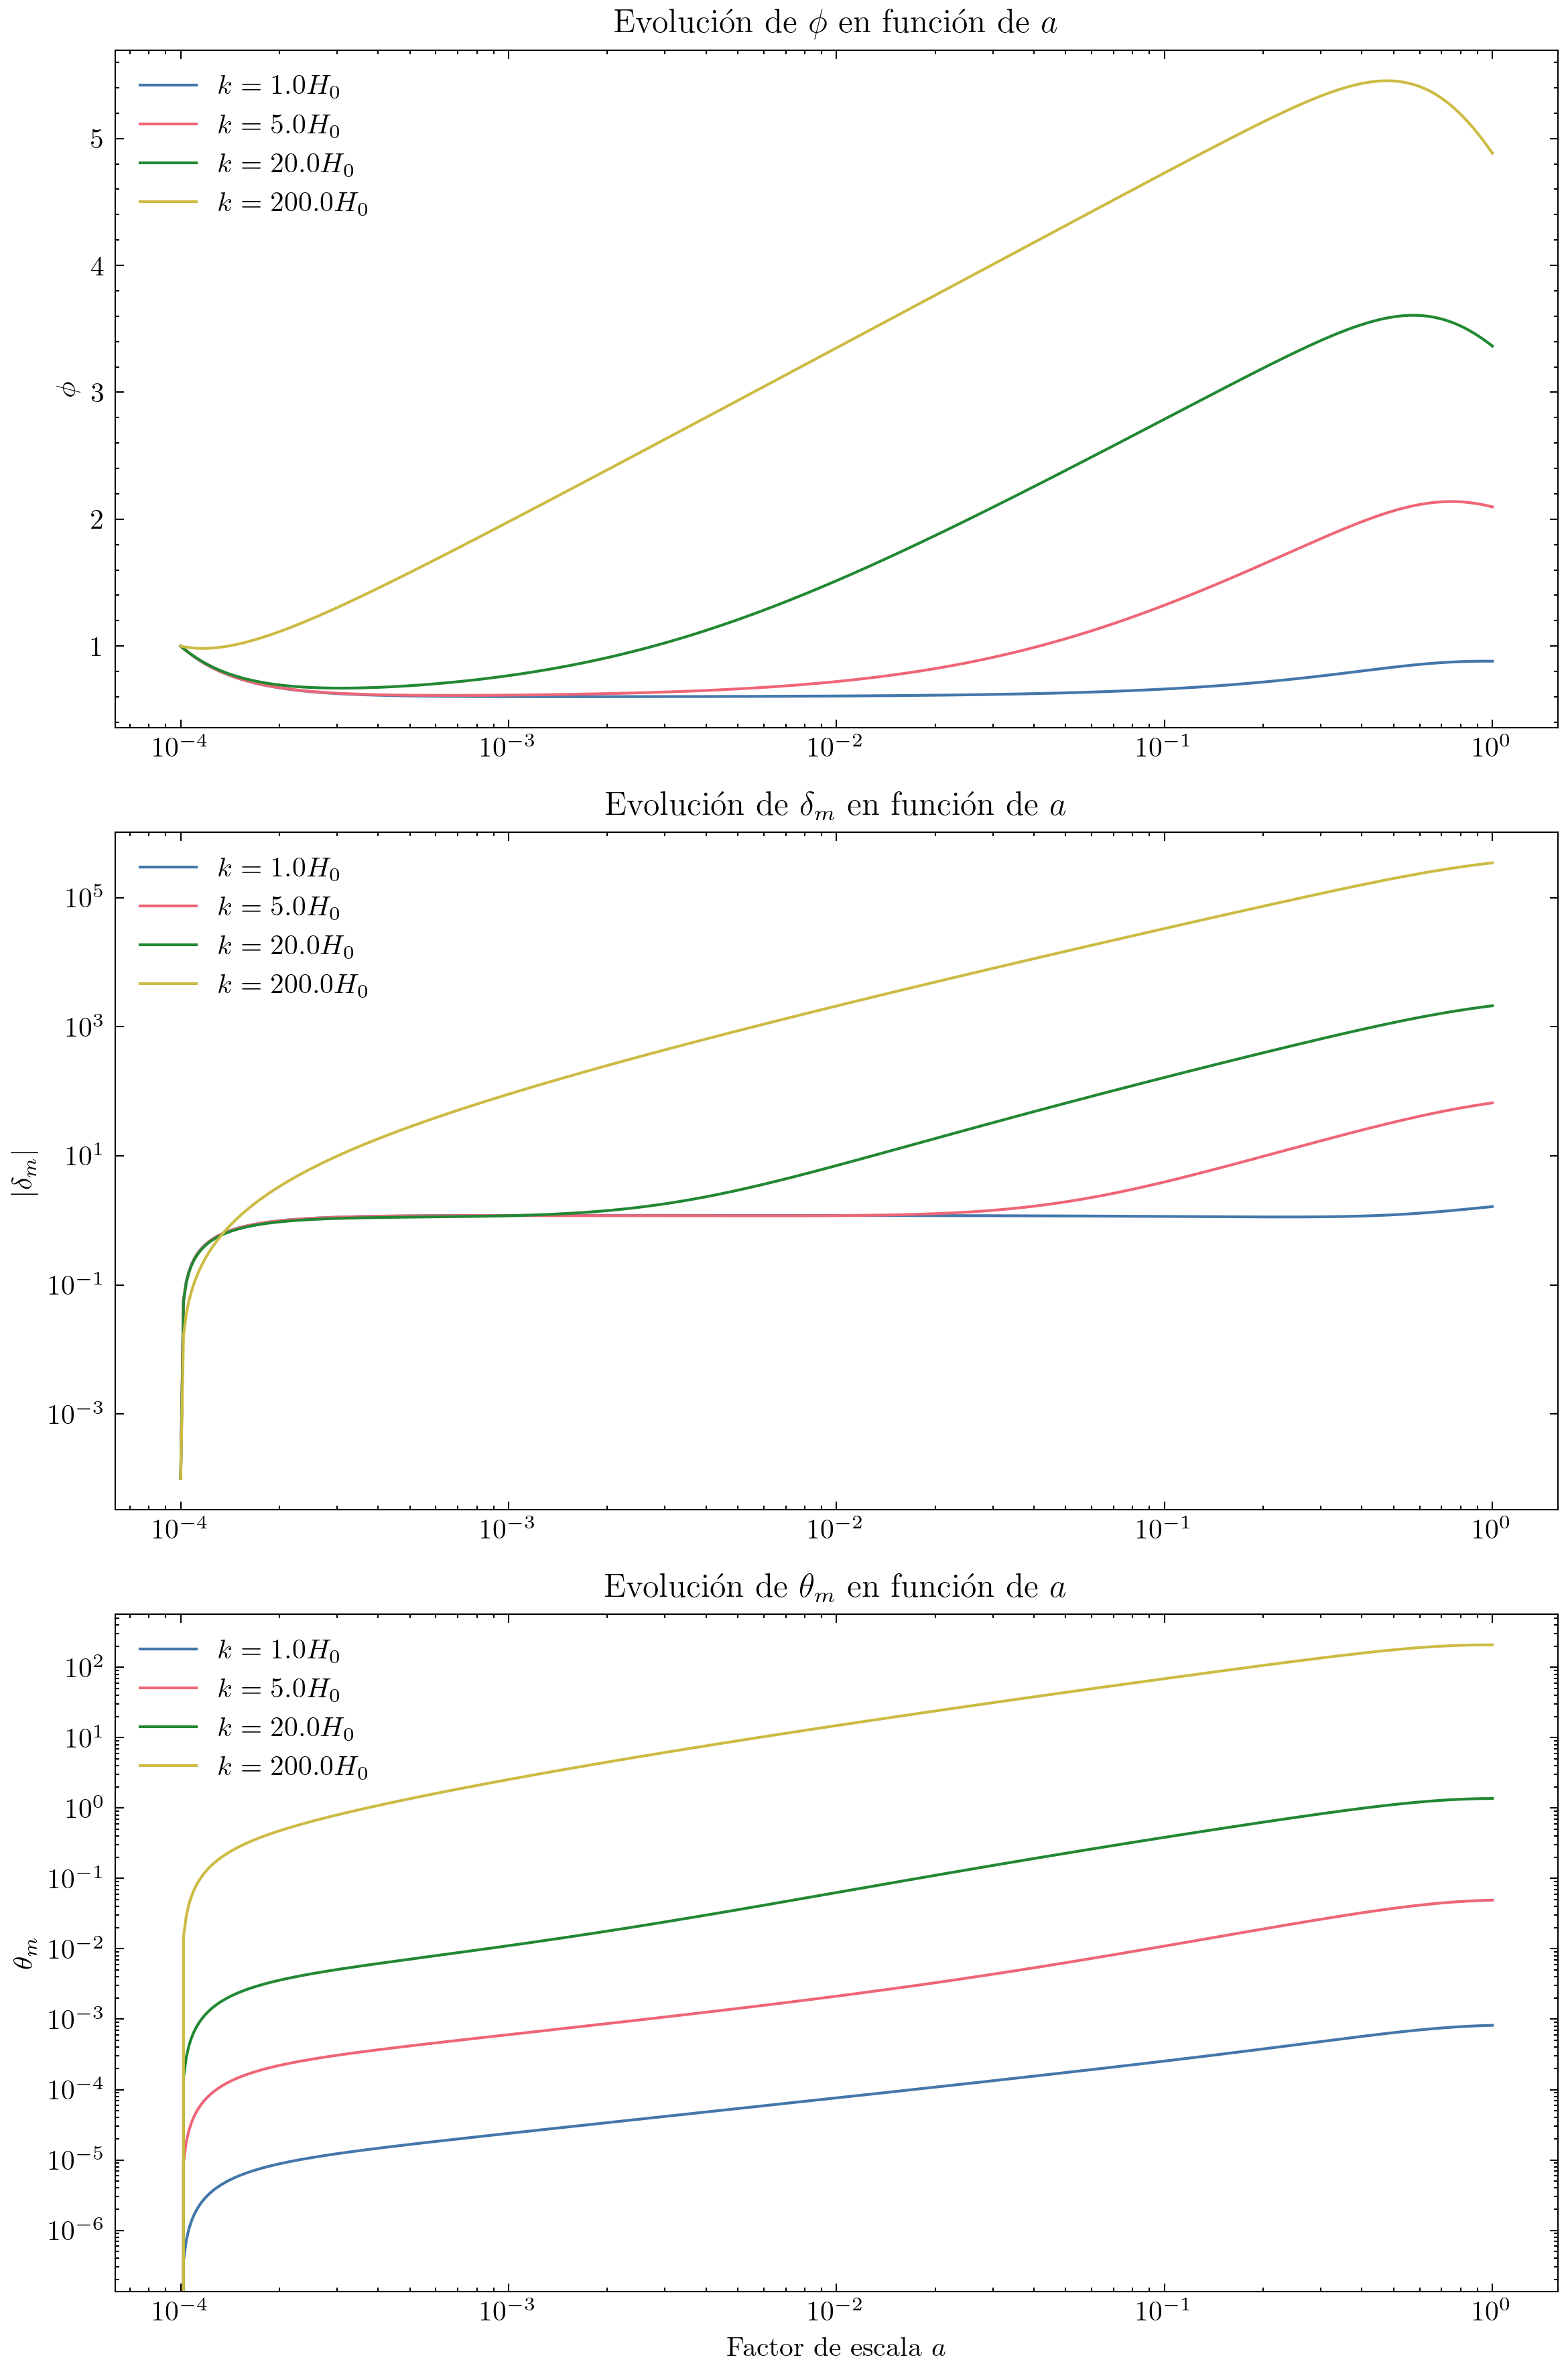

In [23]:
# Constantes 
H0 = 1.036e-3  # H0 en unidades de Mpc^{-1}
Omega_m0 = 0.3  
Omega_L0 = 1 - Omega_m0  
k_values = [H0, 5 * H0, 20 * H0, 200 * H0]

# Parámetro de Hubble
def H(a):
    return H0 * np.sqrt(Omega_m0 / a**3 + Omega_L0)

# Derivada del parámetro de Hubble
def H_prime(a):
    return -1.5 * H0 * Omega_m0 / (a**4 * np.sqrt(Omega_m0 / a**3 + Omega_L0))

# Sistema de ecuaciones diferenciales
def sistema(a, y, k):
    phi, delta_m, theta_m = y
    Ha = H(a)
    Ha_prime = H_prime(a)
    
    dphi_da = -3 * H0**2 * Omega_m0 * (-a * Ha * k**2 * delta_m - 3 * a**2 * Ha**2 * theta_m - k**2 * theta_m + 3 * a * Ha * k**2 * phi + 3 * a**3 * Ha * theta_m * Ha_prime) / (a**2 * Ha * k**2 * (2 * a * k**2 + 9 * H0**2 * Omega_m0))
    
    ddelta_m_da = - (2 * k**4 * theta_m - 9 * Ha * H0**2 * k**2 * delta_m * Omega_m0 - 27 * a * Ha**2 * H0**2 * theta_m * Omega_m0 + 27 * Ha * H0**2 * k**2 * phi * Omega_m0 + 27 * a**2 * Ha * H0**2 * theta_m * Omega_m0 * Ha_prime) / (a * Ha * k**2 * (2 * a * k**2 + 9 * H0**2 * Omega_m0))
    
    dtheta_m_da = - (a * Ha * theta_m - k**2 * phi) / (a**2 * Ha)
    
    return [dphi_da, ddelta_m_da, dtheta_m_da]

# Condiciones iniciales
a_min = 1e-4  
a_max = 1.0    
y0 = [1, 1e-4, 0]  # [phi, delta_m, theta_m]

fig, axs = plt.subplots(3, 1, figsize=(8, 12))

for k in k_values:
    # Resolver el sistema
    a_vals = np.linspace(a_min, a_max, 500000)
    sol = solve_ivp(sistema, [a_min, a_max], y0, t_eval=a_vals, args=(k,), method='RK45')
    
    # Gráfico para phi
    axs[0].plot(sol.t, sol.y[0], label=f'$k = {k/H0:.1f} H_0$')
    axs[0].set_xscale('log')
    axs[0].set_ylabel(r"$\phi$")
    axs[0].set_title(r"Evolución de $\phi$ en función de $a$")
    axs[0].grid()

    # Gráfico para delta
    axs[1].loglog(sol.t, np.abs(sol.y[1]), label=f'$k = {k/H0:.1f} H_0$')
    axs[1].set_ylabel(r"$|\delta_m|$")
    axs[1].set_title(r"Evolución de $\delta_m$ en función de $a$")
    axs[1].grid()
    
    # Gráfico para theta
    axs[2].loglog(sol.t, sol.y[2], label=f'$k = {k/H0:.1f} H_0$')
    axs[2].set_xlabel(r"Factor de escala $a$")
    axs[2].set_ylabel(r"$\theta_m$")
    axs[2].set_title(r"Evolución de $\theta_m$ en función de $a$")
    axs[2].grid()

for ax in axs:
    ax.legend()

plt.tight_layout()
plt.show()



**P5.** Using CAMB, compute the matter power spectrum at different redshift. Then, manually set the density of massive neutrinos to zero. Comment on the differences and justify the results.


In [24]:
import camb
from camb import model, initialpower

# Parámetros
H0 = 67.4  
omega_m = 0.315  
omega_ch2 = 0.120  
omega_bh2 = 0.0224  
ns = 0.965  
tau = 0.054  
redshifts = [0, 0.5, 1, 2]

# Resolver modelo
pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau) # mnu=0.06 (default)
pars.InitPower.set_params(As=2e-9, ns=ns, r=0)  
pars.set_for_lmax(2500, lens_potential_accuracy=0)
pars.set_matter_power(redshifts=redshifts, kmax=2.0)

results = camb.get_results(pars)

Note: redshifts have been re-sorted (earliest first)


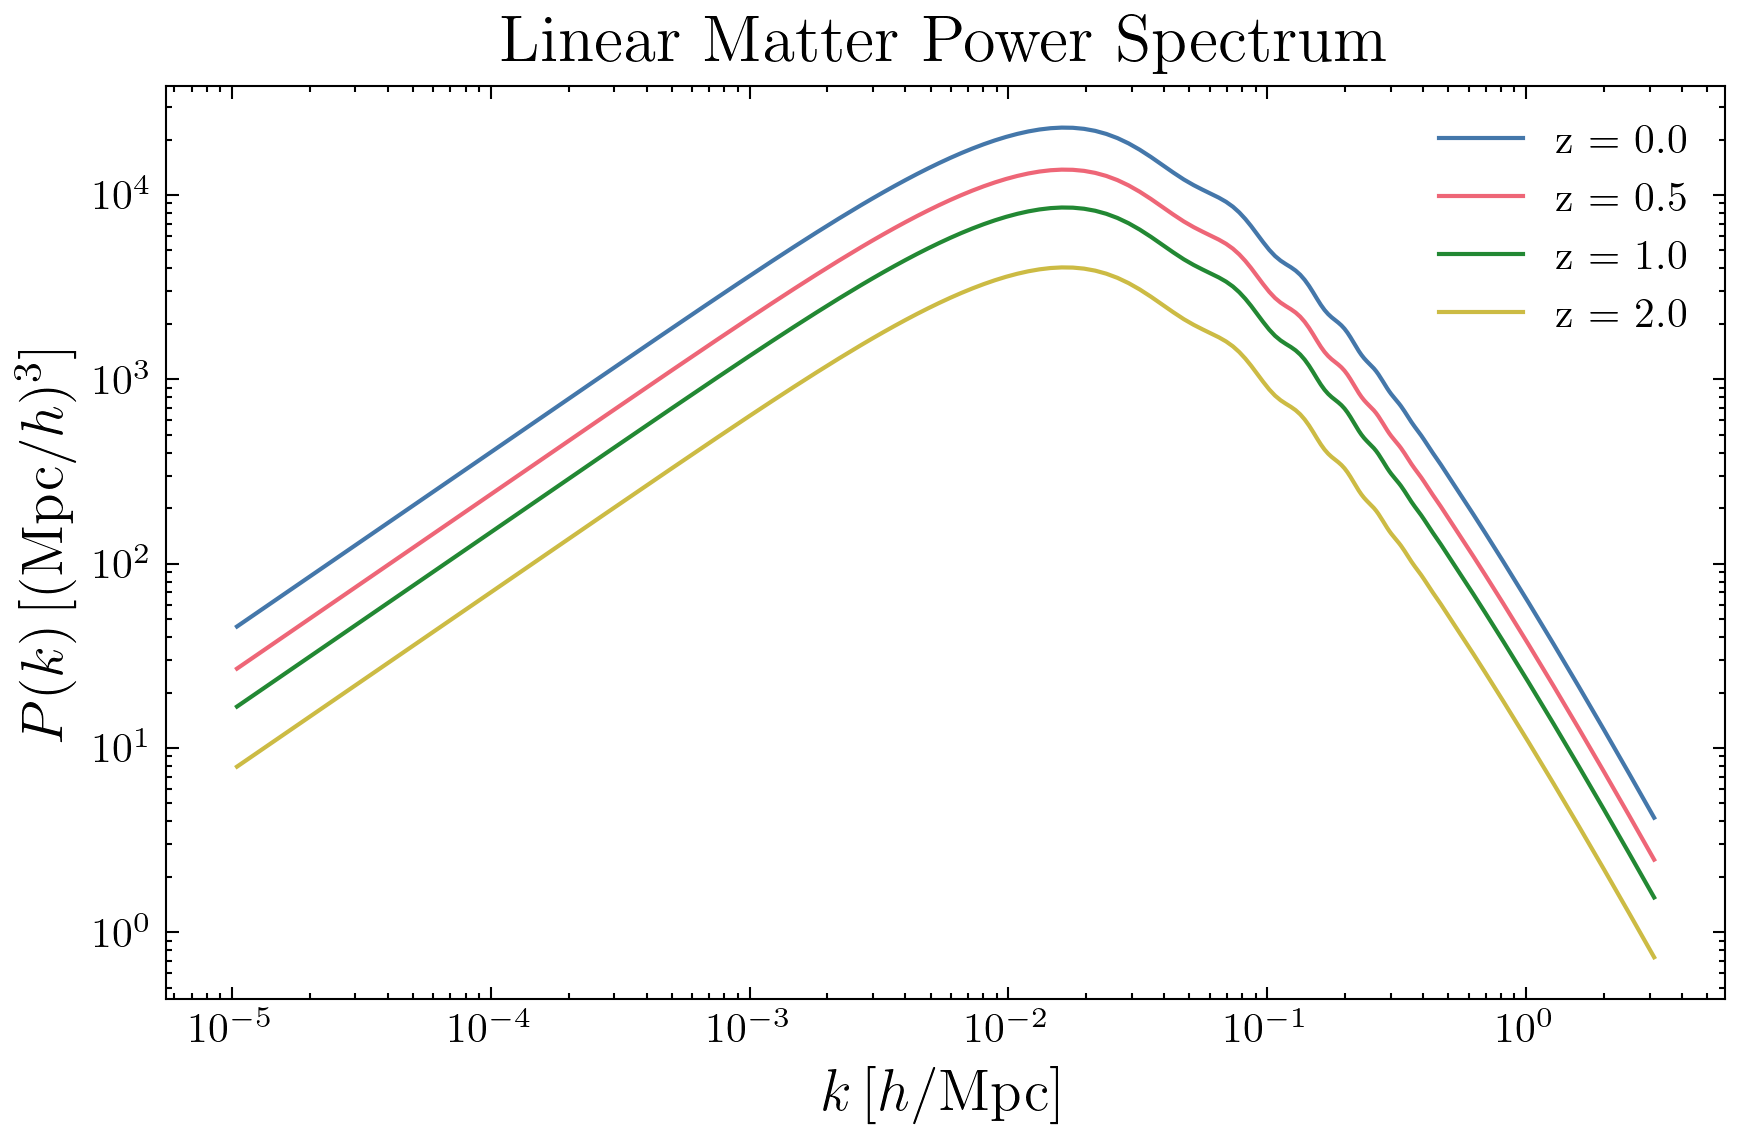

In [25]:
# Linear Matter Power Spectrum
kh, z, PK = results.get_linear_matter_power_spectrum(hubble_units=True, k_hunit=True)

# Gráfico
plt.figure(figsize=(6, 4))

for i, redshift in enumerate(z):
    plt.loglog(kh, PK[i], label=f'z = {redshift}')

plt.xlabel(r'$k \, [h/\mathrm{Mpc}]$', fontsize=14)
plt.ylabel(r'$P(k) \, [(\mathrm{Mpc}/h)^3]$', fontsize=14)
plt.title('Linear Matter Power Spectrum', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

Aqui se muestra el espectro de potencia de materia lineal $P(k)$ en función del número de onda $k$, para diferentes corrimientos al rojo $z$. Se observa que, a menor $z$, la potencia es mayor en escalas grandes (pequeños $k$), lo que indica que las estructuras a gran escala crecen con el tiempo. Además, el pico del espectro se desplaza hacia valores mayores de $k$ conforme aumenta $z$, lo cual refleja que las perturbaciones en la densidad de materia tenían una escala característica más grande en épocas tempranas del universo. A escalas pequeñas (grandes $k$), el espectro de potencia decae para todos los valores de $z$, siendo más pronunciado a mayores $z$.


k_NL(z=0.0) = 0.22003129124641418
k_NL(z=0.5) = 0.3169160485267639
k_NL(z=1.0) = 0.4676256477832795
k_NL(z=2.0) = 1.0200239419937134


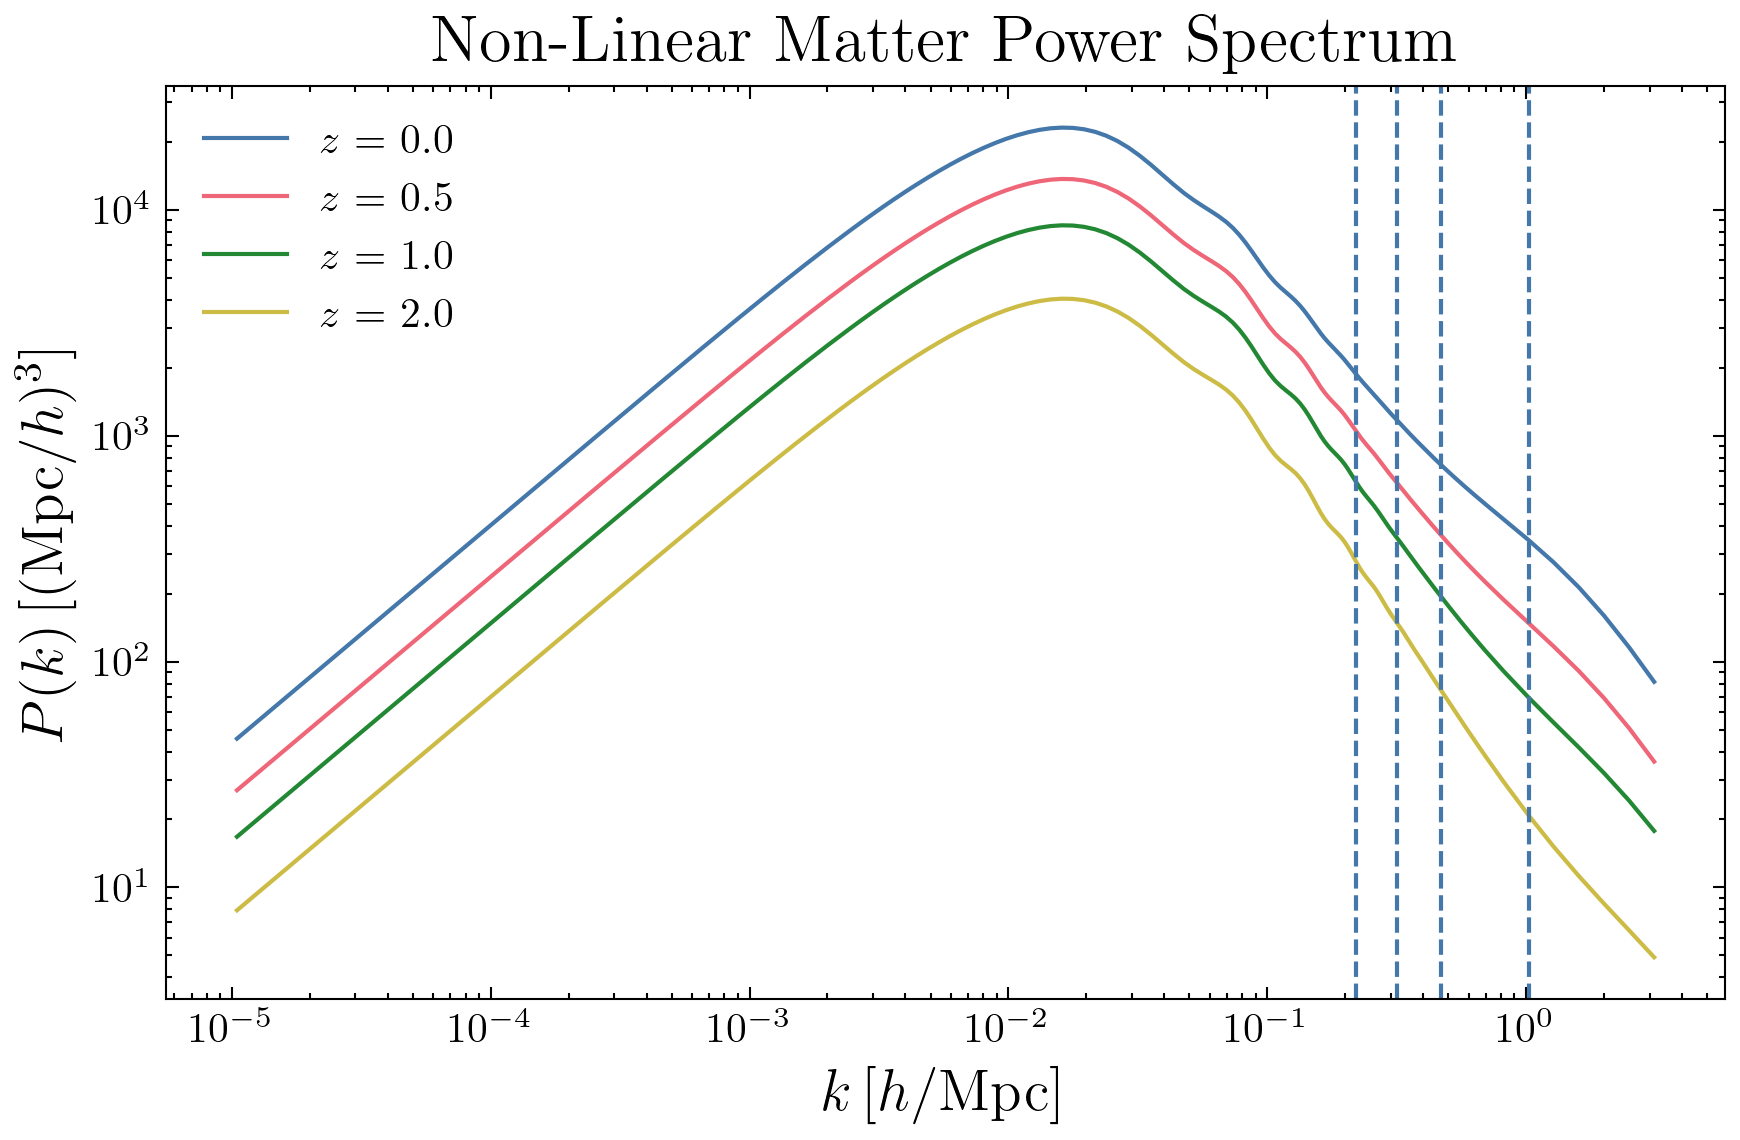

In [26]:
# Non-Linear Matter Power Spectrum
kh, z, PK = results.get_linear_matter_power_spectrum(hubble_units=True, k_hunit=True, nonlinear=True)

# Límite no lineal (según el Dodelson)
def delta_squared(k, Pk):
    return (k**3 * Pk) / (2 * np.pi**2)

k_NL = []

for i, redshift in enumerate(z):
    a = 1 / (1 + redshift)  
    delta_L2 = delta_squared(kh, PK[i])  
    
    k_nl_value = kh[np.abs(delta_L2 - 1).argmin()]  
    k_NL.append(k_nl_value)

    print(f"k_NL(z={redshift}) = {k_nl_value}")

# Gráfico
plt.figure(figsize=(6, 4))
for i, redshift in enumerate(z):
    plt.loglog(kh, PK[i], label=f'$z$ = {redshift}')

for i, k_val in enumerate(k_NL):
    plt.axvline(x=k_val, linestyle="--")

plt.xlabel(r'$k \, [h/\mathrm{Mpc}]$', fontsize=14)
plt.ylabel(r'$P(k) \, [(\mathrm{Mpc}/h)^3]$', fontsize=14)
plt.title('Non-Linear Matter Power Spectrum', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

Por otra parte, en esta figura se muestra el espectro de potencia de materia no lineal $P(k)$ en función del número de onda $k$, para diferentes corrimientos al rojo $z$. Las líneas verticales representan el valor crítico $k_{\text{NL}}$, a partir del cual los efectos no lineales se vuelven importantes, desviándose de la solución lineal en escalas pequeñas (grandes $k$). Este valor $k_{\text{NL}}$ fue calculado imponiendo que el espectro de potencia de materia lineal satisface $\Delta^2_L(k, a) = \frac{k^3 P(k)}{2 \pi^2} = 1$. A partir de este punto, las perturbaciones de la densidad comienzan a crecer de forma no lineal, lo que modifica significativamente el espectro de potencia. (Dodelson $(8.9)$)



Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


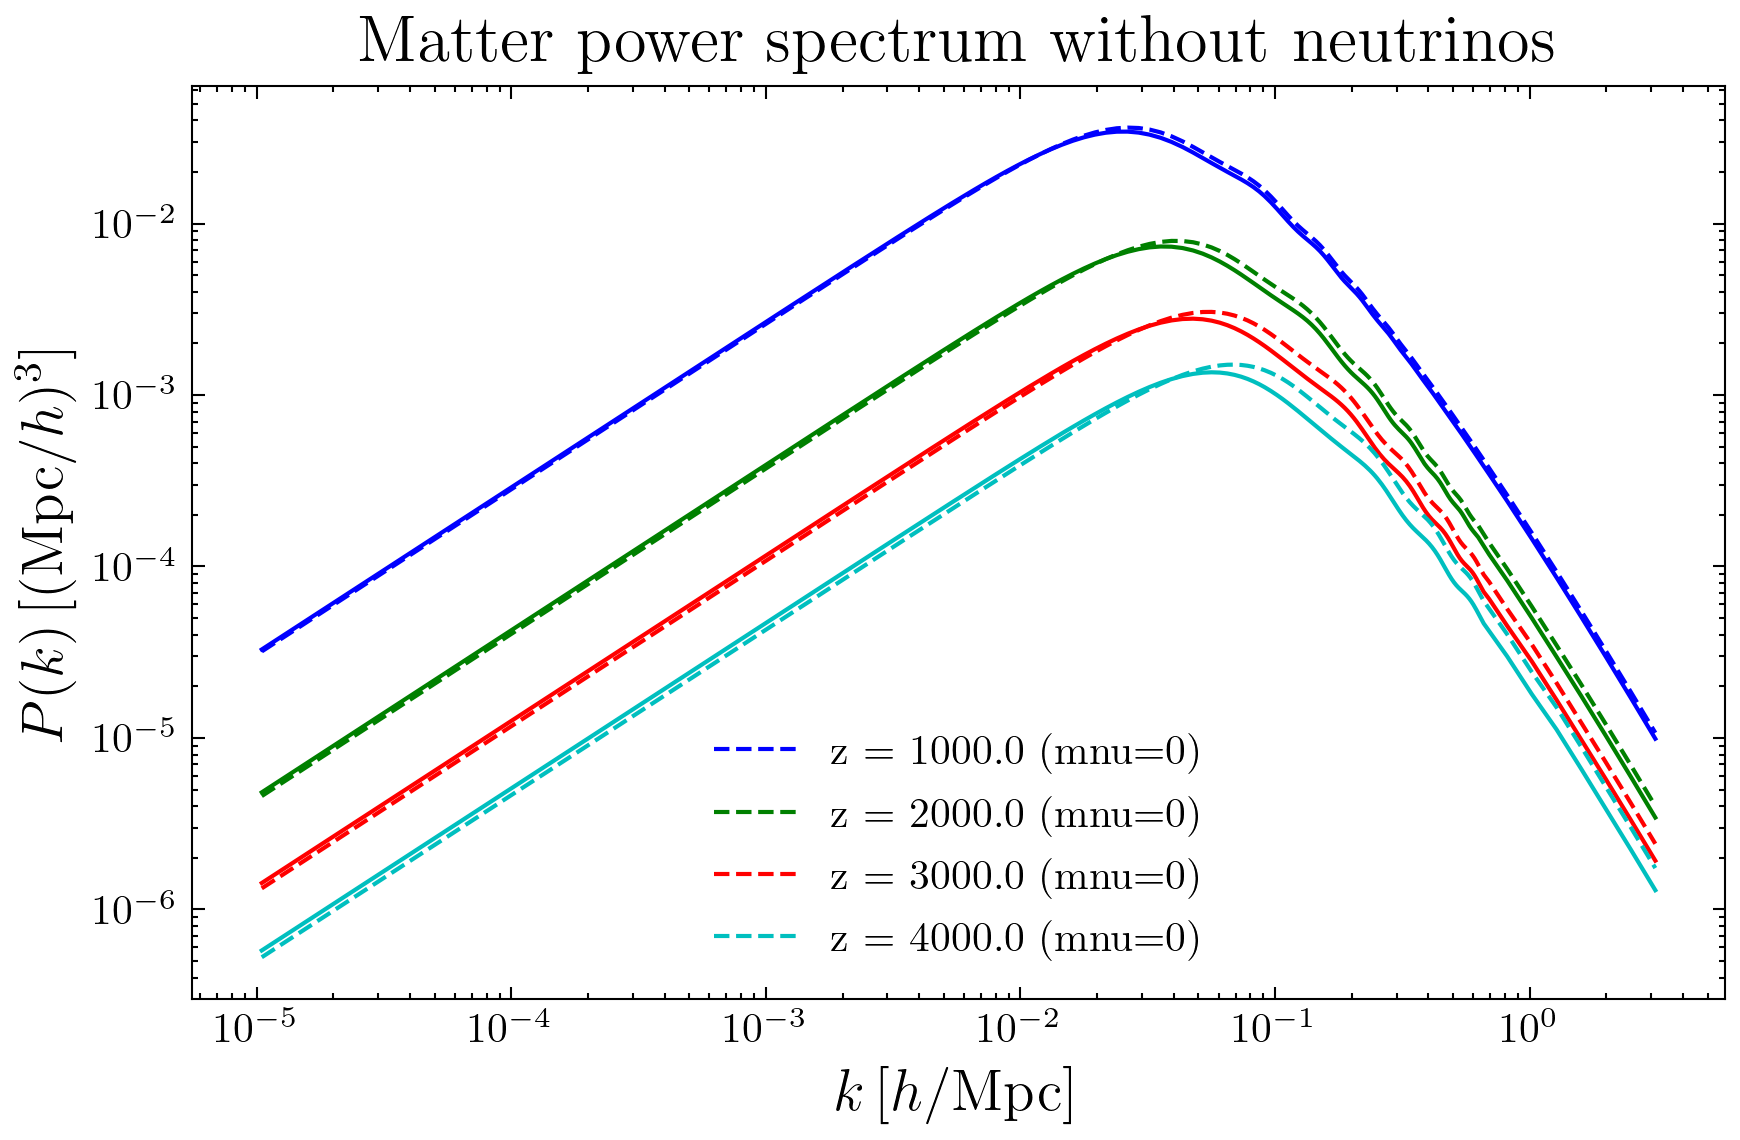

In [27]:
# Modelo con mnu = 0.06
pars1 = camb.CAMBparams()
pars1.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau, mnu=0.06)
pars1.InitPower.set_params(As=2e-9, ns=ns, r=0)  
pars1.set_for_lmax(2500, lens_potential_accuracy=0)
pars1.set_matter_power(redshifts=[1000, 2000, 3000, 4000], kmax=2.0) # Cambiamos la lista de redshift
results1 = camb.get_results(pars1)
kh, z, PK1 = results1.get_linear_matter_power_spectrum(hubble_units=True, k_hunit=True)

# Modelo con mnu = 0
pars2 = camb.CAMBparams()
pars2.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau, mnu=0)
pars2.InitPower.set_params(As=2e-9, ns=ns, r=0)  
pars2.set_for_lmax(2500, lens_potential_accuracy=0)
pars2.set_matter_power(redshifts=[1000, 2000, 3000, 4000], kmax=2.0) # Cambiamos la lista de redshift
results2 = camb.get_results(pars2)
kh, z, PK2 = results2.get_linear_matter_power_spectrum(hubble_units=True, k_hunit=True)

# Gráfico
colors = ['b', 'g', 'r', 'c'] 
plt.figure(figsize=(6, 4))

for i, redshift in enumerate(z):
    plt.loglog(kh, PK1[i], color=colors[i])
    plt.loglog(kh, PK2[i], color=colors[i], linestyle='--', label=f'z = {redshift} (mnu=0)')

plt.xlabel(r'$k \, [h/\mathrm{Mpc}]$', fontsize=14)
plt.ylabel(r'$P(k) \, [(\mathrm{Mpc}/h)^3]$', fontsize=14)
plt.title('Matter power spectrum without neutrinos', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()


Finalmente, se muestra la comparación entre los espectros de potencia de materia $P(k)$ con y sin neutrinos. Las líneas sólidas representan la solución con neutrinos, mientras que las líneas discontinuas corresponden a la solución sin neutrinos. Se observa que, en escalas grandes (pequeños $k$), la presencia de neutrinos afecta ligeramente el espectro de potencia, mientras que en escalas pequeñas (grandes $k$), la presencia de neutrinos se vuelve notable. Físicamente, esto se debe a que los neutrinos, al moverse rápidamente y dispersarse fuera de áreas de alta densidad, suprimen el crecimiento de la estructura en escalas más pequeñas que la distancia típica que recorren. Matemáticamente, los neutrinos masivos rompen la descomposición en función de transferencia y el factor de crecimiento en escalas más pequeñas que la escala libre de propagación, es decir $ D_{+}$ se vuelve dependiente de la escala, o de manera equivalente, $T(k)$ se vuelve dependiente del tiempo.
Este efecto es notable a redshifts altos, como se puede ver en las curvas correspondientes a $z = 1000$, $z = 2000$, $z = 3000$ y $z = 4000$. A medida que $z$ disminuye, la diferencia entre las soluciones con y sin neutrinos se reduce. 




**P6.** Using CAMB compute the TT angular power spectrum. Then, explore different cosmological parameters and explain the differences in the results. Give at least one compelling example and its justification.



In [28]:
powers = results.get_cmb_power_spectra(pars, CMB_unit="muK")
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


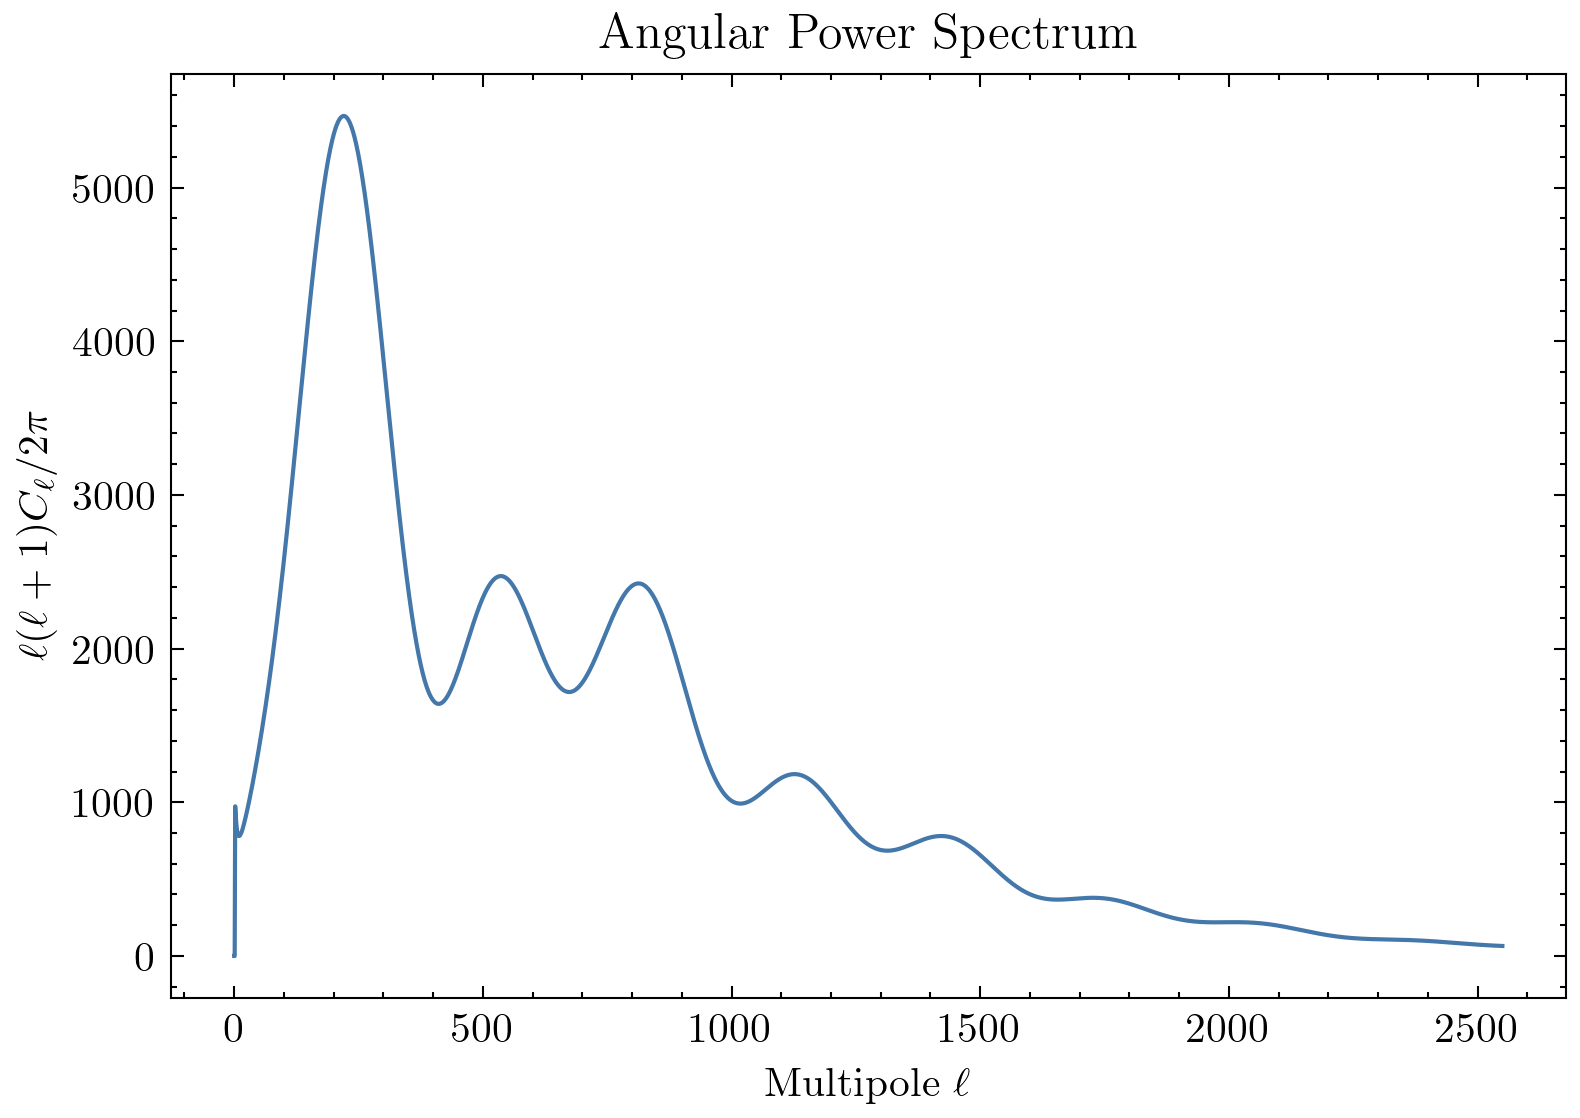

In [29]:
# Angular Power Spectrum para los parámetros definidos en la pregunta anterior
ell = np.arange(powers['total'].shape[0]) 
cl_TT = powers['total'][:, 0]  

# Gráfico
plt.figure(figsize=(6,4))
plt.plot(ell, cl_TT, label='TT')
plt.xlabel(r'Multipole $\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell / 2\pi$')
plt.title('Angular Power Spectrum')
plt.show()

Dependencia de curvatura:

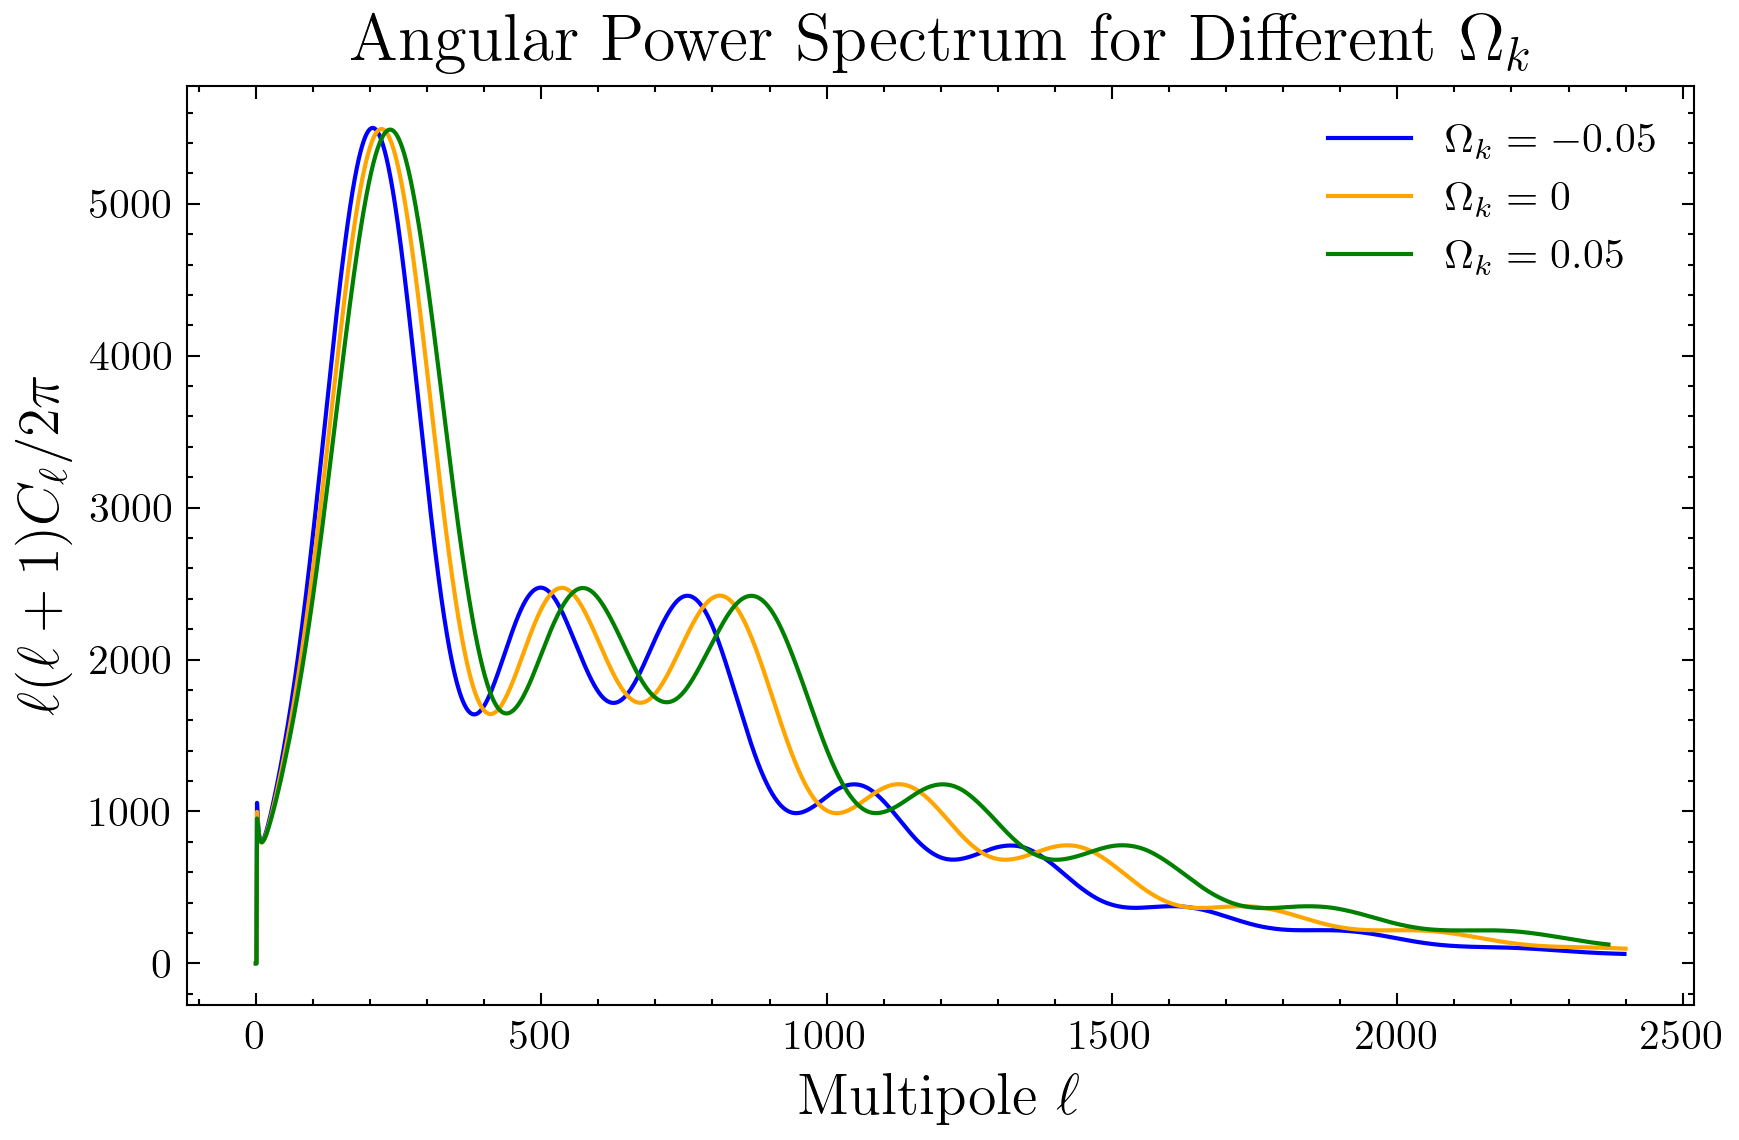

In [30]:
# Variación de omega_k
omega_k_variation = [-0.05, 0, 0.05]  
colors = ['blue', 'orange', 'green']
plt.figure(figsize=(6, 4))

for omega_k_new in omega_k_variation:
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, omk=omega_k_new, tau=tau)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit="muK")
    cl_TT = powers['total'][:, 0]
    ell = np.arange(powers['total'].shape[0])
    plt.plot(ell, cl_TT, label=f'$\Omega_k = {omega_k_new}$', color=colors.pop(0))

plt.xlabel(r'Multipole $\ell$', fontsize=14)
plt.ylabel(r'$\ell(\ell+1)C_\ell / 2\pi$', fontsize=14)
plt.title('Angular Power Spectrum for Different $\Omega_k$', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

En un universo no euclidiano, como el caso de una geometría abierta o cerrada, las geodésicas de los fotones que inicialmente son paralelas pueden converger o diverger, lo que afecta la ubicación de los picos en el espectro angular. En un universo abierto (gráfico verde), una escala física fija, como la del primer pico del espectro, se proyecta en un ángulo más pequeño, desplazando los picos hacia valores más altos de $𝑙$. Por el contrario, en un universo cerrado (gráfico azul), los picos se desplazan hacia valores más bajos de $l$. Esta sensibilidad de los picos del espectro angular a la curvatura se debe a la distancia angular al horizonte de última dispersión.

Efecto de la profundidad óptica en la reionización:

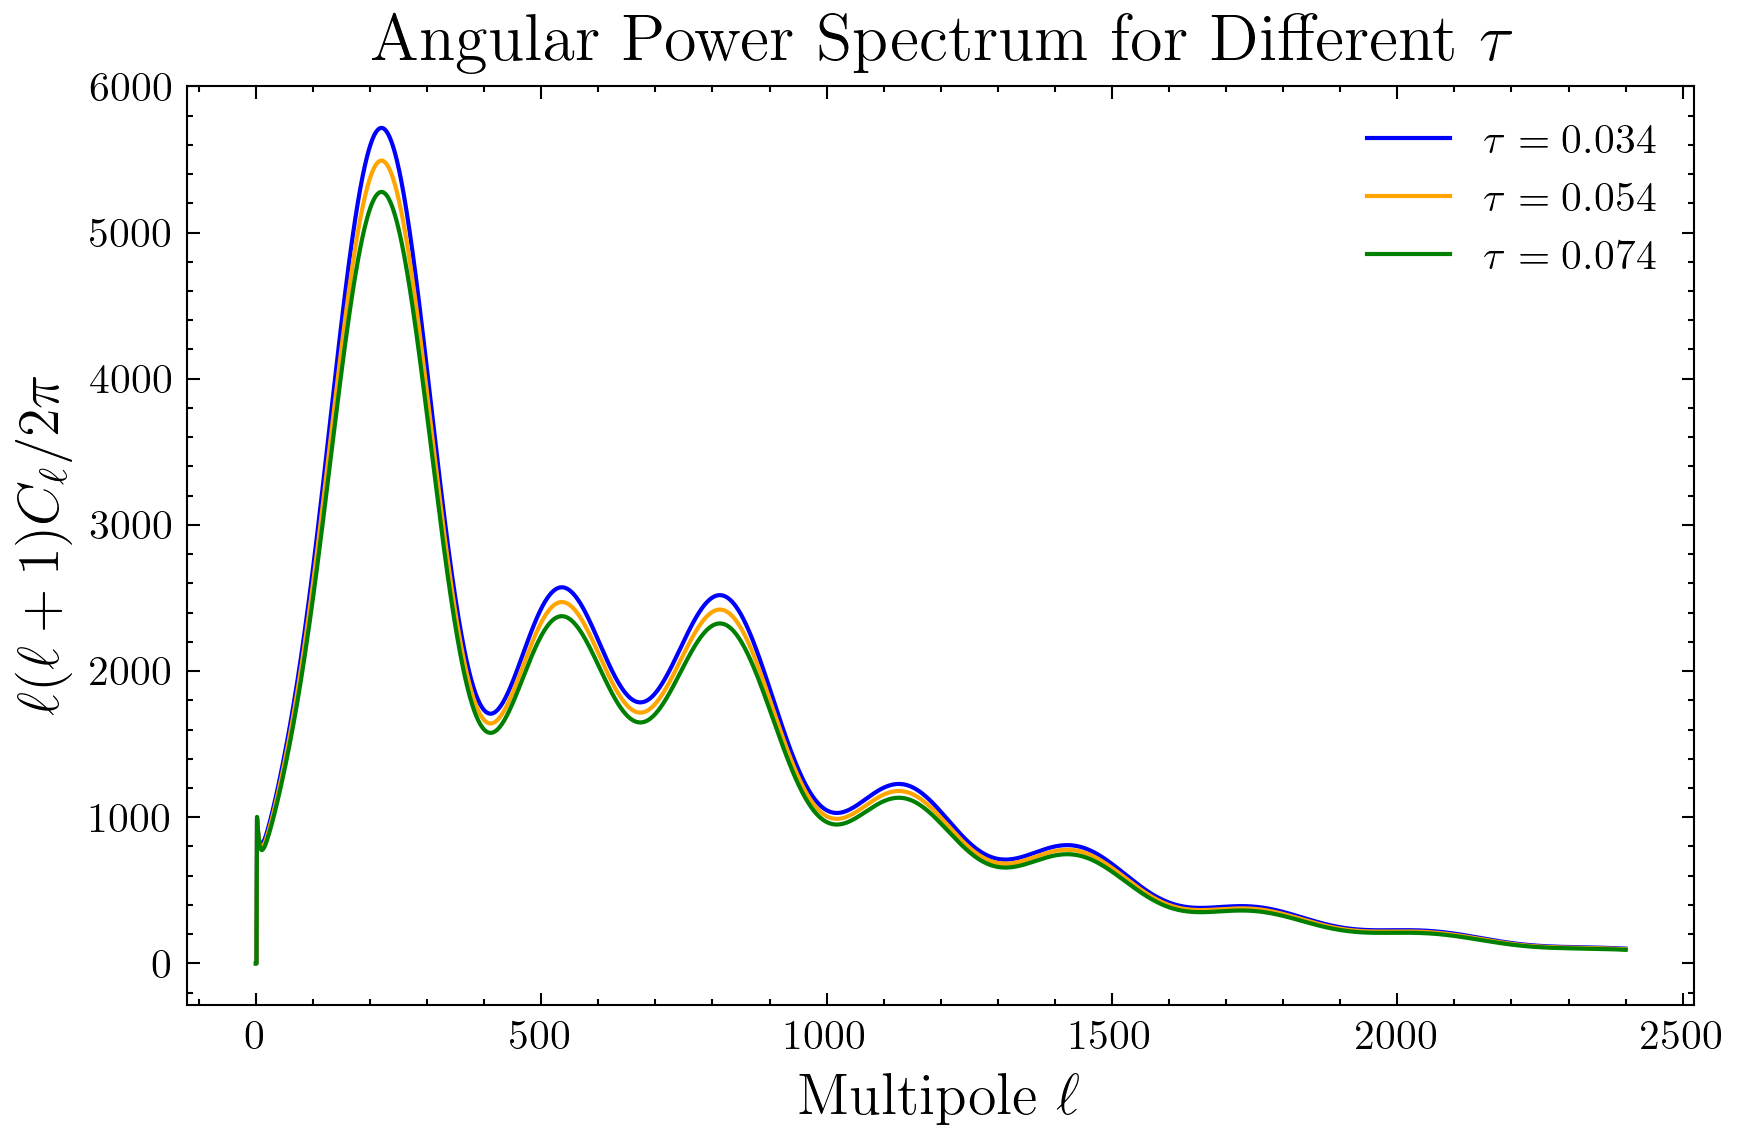

In [31]:
# Variación de tau
tau_variation = [0.034, 0.054, 0.074]  
colors = ['blue', 'orange', 'green']
plt.figure(figsize=(6, 4))

for tau_new in tau_variation:
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau_new)  # Usar tau variable
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit="muK")
    cl_TT = powers['total'][:, 0]
    ell = np.arange(powers['total'].shape[0])
    
    plt.plot(ell, cl_TT, label=fr'$\tau = {tau_new}$', color=colors.pop(0))

plt.xlabel(r'Multipole $\ell$', fontsize=14)
plt.ylabel(r'$\ell(\ell+1)C_\ell / 2\pi$', fontsize=14)
plt.title(r'Angular Power Spectrum for Different $\tau$', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

Cuando $\tau_{\text{rei}}$ aumenta, se produce una supresión de las anisotropías en escalas pequeñas, lo que se traduce en una disminución de la amplitud de los picos del espectro en esos rangos de multipolos altos ($ 100 \lesssim l \lesssim 1000$). Esto ocurre porque la mayor parte de la dispersión de los fotones en la región ionizada se traduce en una mezcla de temperaturas que suaviza las perturbaciones primordiales en esas escalas. Sin embargo, las anisotropías en escalas grandes (es decir, para multipolos bajos, $l \lesssim 100$) permanecen casi sin cambios, ya que los efectos de la reionización afectan principalmente a aquellas perturbaciones que estaban presentes dentro del horizonte en el momento de la reionización. 


Variación de densidad de bariones:

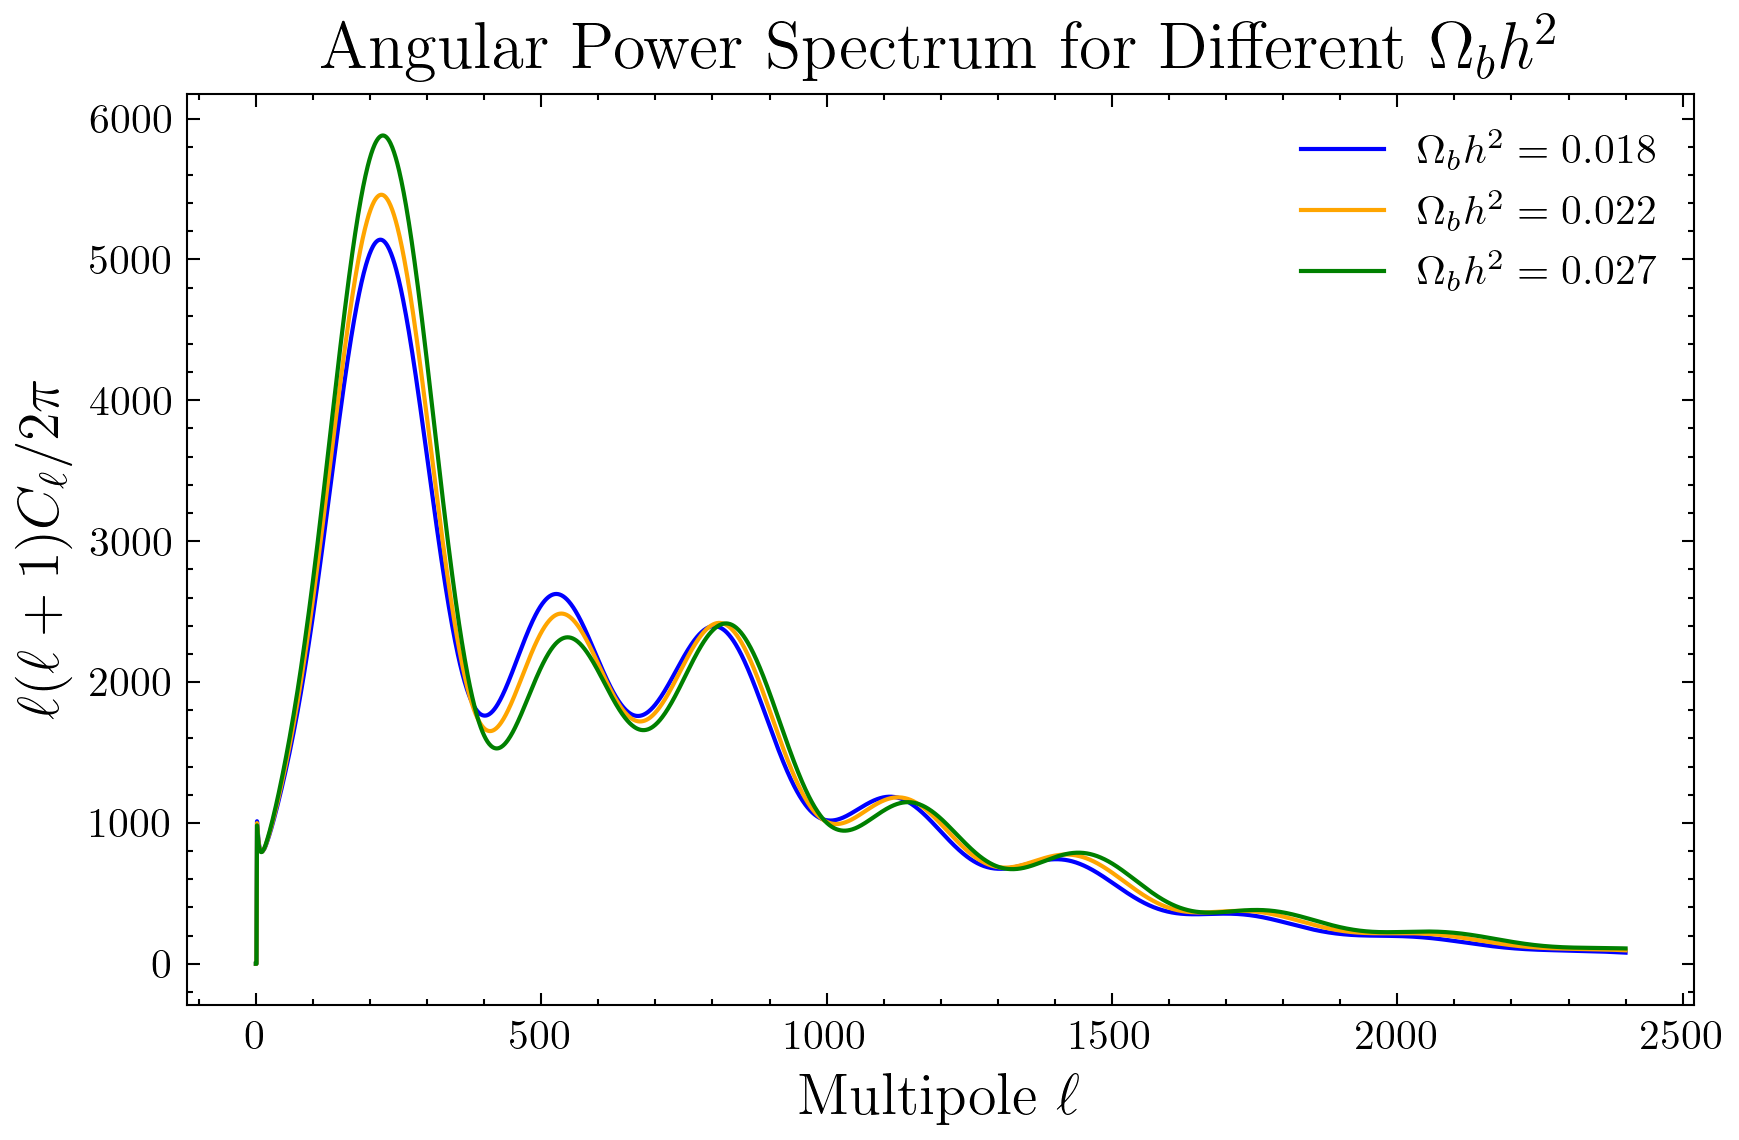

In [32]:
# Variación de ombh2
omega_bh2_variation = [0.018, 0.022, 0.027] 
colors = ['blue', 'orange', 'green']
plt.figure(figsize=(6, 4))

for omega_bh2_new in omega_bh2_variation:
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H0, ombh2=omega_bh2_new, omch2=omega_ch2, tau=tau)  # Usar omega_bh2 variable
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit="muK")
    cl_TT = powers['total'][:, 0]
    ell = np.arange(powers['total'].shape[0])
    
    plt.plot(ell, cl_TT, label=f'$\Omega _b h^{2} = {omega_bh2_new}$', color=colors.pop(0))

plt.xlabel(r'Multipole $\ell$', fontsize=14)
plt.ylabel(r'$\ell(\ell+1)C_\ell / 2\pi$', fontsize=14)
plt.title('Angular Power Spectrum for Different $\Omega _b h^{2}$', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

Al variar la densidad de bariones $\Omega_b h^2$, el espectro angular de anisotropías presenta dos cambios principales: una modificación en la posición de los picos y una alteración en sus alturas. Un aumento en la densidad de bariones provoca un desplazamiento de los picos debido a la reducción del horizonte sonoro $r_s(\eta_*)$, lo cual ajusta la ubicación de las oscilaciones acústicas en multipolos $l$ mayores. Además, la relación entre las alturas de los picos impares y pares se incrementa, mostrando que los picos impares se hacen más altos en relación con los pares cuando la densidad de bariones es mayor. Adicionalmente, al aumentar $\Omega_b h^2$, la longitud de difusión disminuye, moviendo el amortiguamiento a escalas angulares más pequeñas y haciendo que el espectro de anisotropía en multipolos $l > 1000$ sea más alto.

Variación de densidad de materia oscura fría:

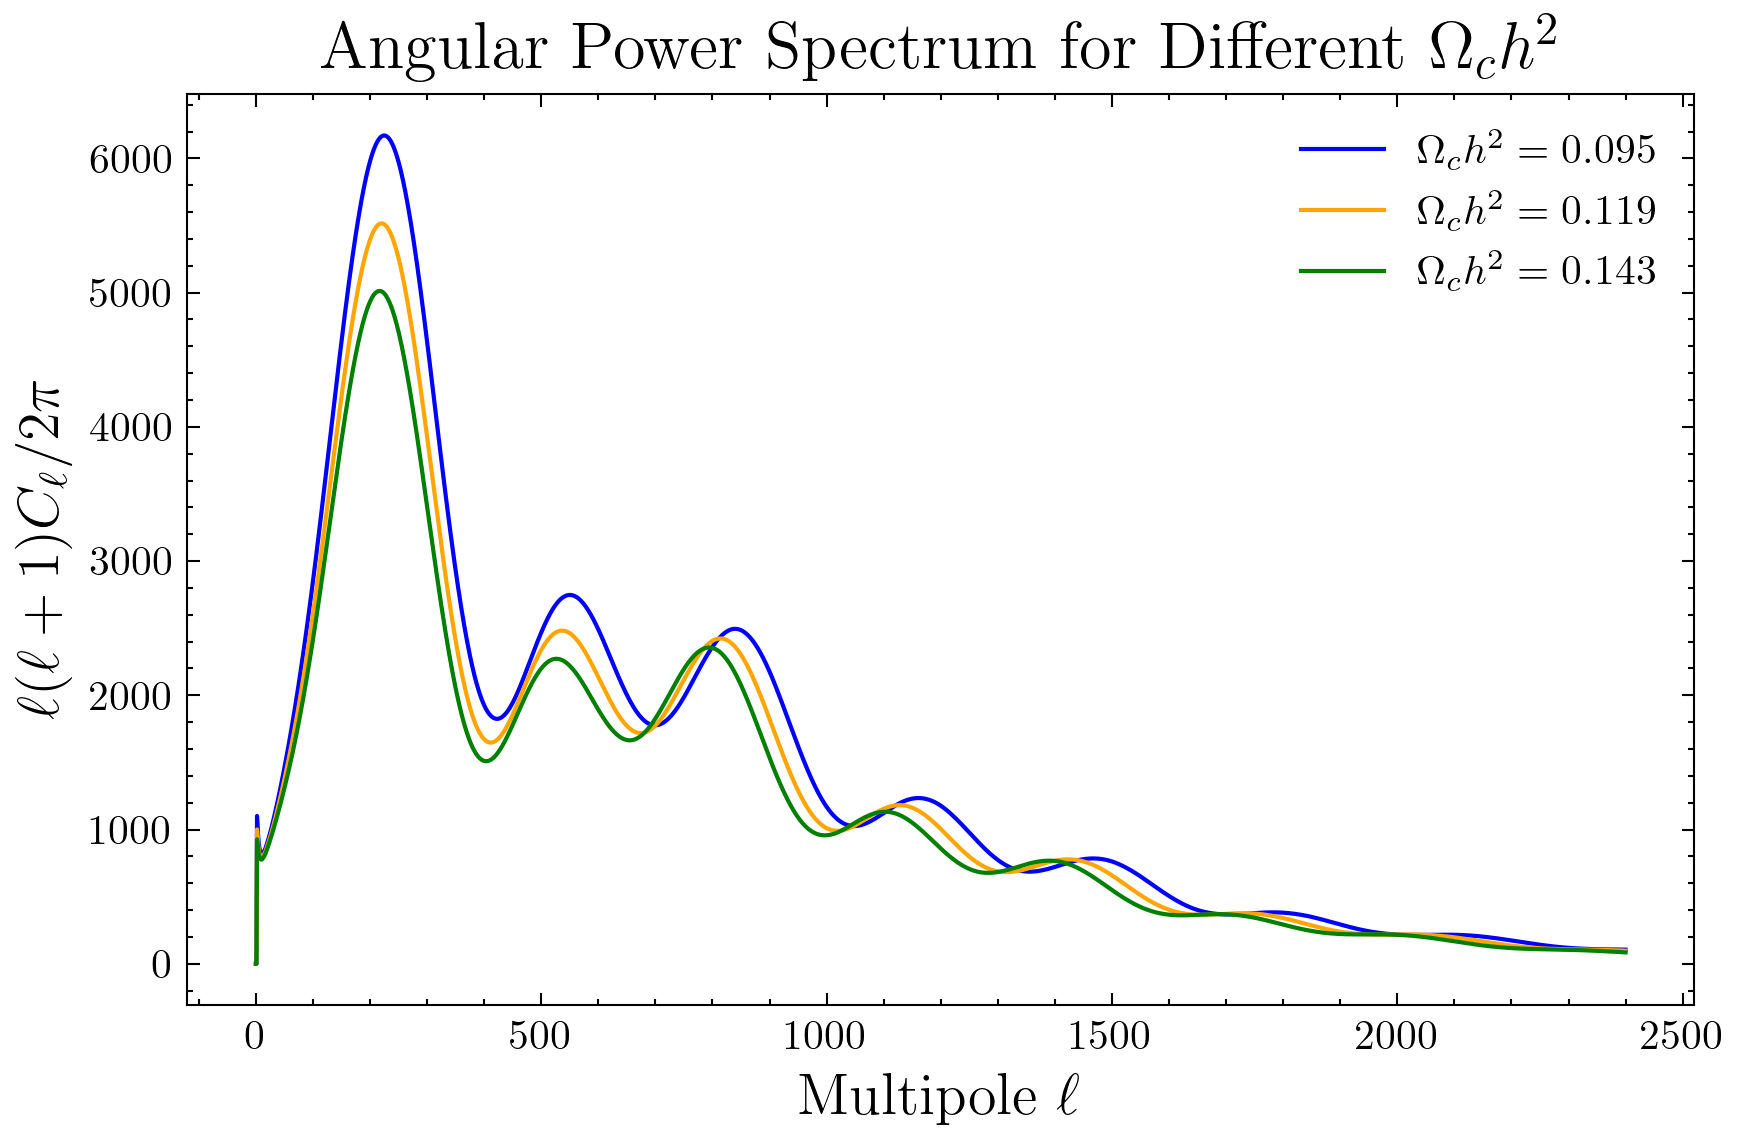

In [33]:
# Variación de omch2
omega_c_variation = [0.095, 0.119, 0.143]  
colors = ['blue', 'orange', 'green']
plt.figure(figsize=(6, 4))

for omega_c_new in omega_c_variation:
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_c_new, tau=tau)  # Usar omega_ch2 variable
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit="muK")
    cl_TT = powers['total'][:, 0]
    ell = np.arange(powers['total'].shape[0])
    
    plt.plot(ell, cl_TT, label=f'$\Omega_c h^2 = {omega_c_new}$', color=colors.pop(0))

plt.xlabel(r'Multipole $\ell$', fontsize=14)
plt.ylabel(r'$\ell(\ell+1)C_\ell / 2\pi$', fontsize=14)
plt.title('Angular Power Spectrum for Different $\Omega_c h^2$', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

Al variar la densidad de materia oscura $\Omega_c h^2$, el espectro angular de anisotropías cambia principalmente en dos aspectos: la amplitud de las oscilaciones acústicas y el efecto ISW (Integrated Sachs-Wolfe) temprano. Dado que la materia oscura domina el potencial gravitacional, un incremento en $\Omega_c h^2$ amplifica el término de "conducción" de las oscilaciones acústicas, lo que afecta las alturas de los picos de una manera similar al cambio en la densidad de bariones. Además, la materia oscura determina la época de igualdad (cuando la densidad de materia y radiación son iguales), y un valor más alto de $\Omega_c h^2$ implica un crecimiento mayor de las perturbaciones antes de esta época, lo que modifica la amplitud de los picos en escalas angulares pequeñas. Este aumento en $\Omega_c h^2$ también disminuye el efecto ISW temprano, ya que los potenciales gravitacionales decaen menos tras la recombinación, afectando las anisotropías a bajas $l$.